In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='whitegrid', palette='colorblind')
from google.colab import files

# Hill Climber

A hill climber is an optimisation technique used to find the best solution to given a problem.

Our scenario goes as follows (proposed problem):

- The knapsack (KP) problem is an example of a combinatorial optimization problem. It is concerned with a knapsack that has positive integer volume (or capacity) ​V​. There are ​n distinct items that may potentially be placed in the knapsack. Item ​i ​has a positive integer volume ​Vi ​and positive integer benefit ​Bi​. In the most basic form of the problem we will consider there are only one of each item available (0-1 KP).

Our goal will be to maximise value:

- $\sum_{i}^{N} B{_{i}}$

put under the given constraint (Our bag's max volume):

- $\sum_{i}^{N} B{_{i}}$



#The knapsack

    | Item |  a   | b    | c    | d    | e    | f    | g    | h    | i    | j    |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    | B    | 5    | 6    | 1    | 9    | 2    | 8    | 4    | 3    | 7    | 10   |
    | V    | 3    | 2    | 4    | 5    | 8    | 9    | 10   | 1    | 6    | 7    |

Our bag will have a maximum capacity of 20 cubic inches. There will be N = 10 different items of different sizes and benifits. We want to include the items that have the greatest total benifit within the knapsack's capacity constraint.

# What we need to program our hill-climber:

- Fitness function
  - For our fitness function we want to determine how well we've packed our bag.
    - We will consider the following:
    - The total benifit of the packed items
    - Whether the capacity has overflown
- Mutation function
  - For our mutation function, we will randomly change the "states" of our genotype. We will do this given a mutation rate (as a percentage).

- I will also create a **'birth'** function.
  - This will manage our genotypes.
  - If the new genotype is worse than the genotype it was mutated from, it will be discarded. Otherwise, it will become our main genotype.

Stopping condition:
- stop when you flat out or set the number of interations.

# Our items with their benifits and capacity

In [ ]:
# Initialising our array of items
items = [(5, 3), (6, 2), (1, 4), (9, 5), (2, 8), (8, 9), (4, 10), (3, 1), (7, 6), (10, 7)]

# Basic Hill Climber

In [ ]:
class Hill_climber():

  def __init__(self, items, gt, capacity, mutateRate):
    self.items = items
    self.capacity = capacity
    self.mutateRate = mutateRate
    self.gt = gt
    self.totalCapacity = 0
  
  # mutation function
  def mutate(self, tmpGt):
    for i in range(len(self.items)):
      prob = np.random.random(1)[0];
      if (prob <= self.mutateRate):
        tmpGt[i] = tmpGt[i] ^ 1
    return tmpGt

  # fitness function
  def fitness(self, gt):
    benifit = 0
    self.totalCapacity = 0
    for i in range(len(self.items)):
      if gt[i] == 1:
        benifit += self.items[i][0]
        self.totalCapacity += self.items[i][1]
    if self.totalCapacity <= self.capacity:
      return benifit
    return 0

  # birth function
  def birth(self):
    tmpGt = self.mutate(self.gt.copy())
    if self.fitness(tmpGt) > self.fitness(self.gt):
      self.gt = tmpGt

# Testing the Hill Climber:

In [ ]:
def infoGrabber(climber, capacity):
  benifit = 0
  totalcap = 0
  for i in range(len(climber.gt)):
    if climber.gt[i] == 1:
      benifit += climber.items[i][0]
      totalcap += climber.items[i][1]
  if totalcap > capacity:
    benifit = 0
  print("Genotype:", climber.gt)
  print("Benifit:", benifit)
  print("Capacity:", totalcap)

In [ ]:
# genotypes, representing if an item is in or out of the knapsack
gt = np.random.randint(2, size=10)
climber = Hill_climber(items, gt, 20, 0.3)

print("Before hill climbing:")
infoGrabber(climber, 20)

# The process of hill climbing
for i in range(100):
  climber.birth()
print("\nAfter hill climbing:")
infoGrabber(climber, 20)
#climber.fitness(climber.gt)

Before hill climbing:
Genotype: [1 1 0 0 0 0 0 1 1 1]
Benifit: 31
Capacity: 19

After hill climbing:
Genotype: [1 1 0 0 0 0 0 1 1 1]
Benifit: 31
Capacity: 19


# Hill climber class optimised for graph plotting

In [ ]:
class Hill_climber():

  def __init__(self, items, gt, capacity, mutateRate):
    self.items = items
    self.capacity = capacity
    self.mutateRate = mutateRate
    self.gt = gt
    self.totalCapacity = 0
    self.benifitGrowth = []
  
  # mutation function
  def mutate(self, tmpGt):
    for i in range(len(self.items)):
      prob = np.random.random(1)[0];
      if (prob <= self.mutateRate):
        tmpGt[i] = tmpGt[i] ^ 1
    return tmpGt

  # fitness function
  def fitness(self, gt):
    benifit = 0
    self.totalCapacity = 0
    for i in range(len(self.items)):
      if gt[i] == 1:
        benifit += self.items[i][0]
        self.totalCapacity += self.items[i][1]
    if self.totalCapacity <= self.capacity:
      return benifit
    return 0
  
  # birth function
  def birth(self):
    tmpGt = self.mutate(self.gt.copy())
    #print(self.fitness(self.gt), self.fitness(tmpGt))
    tmpGtBenifit = self.fitness(tmpGt)
    gtBenifit = self.fitness(self.gt)
    if tmpGtBenifit > gtBenifit:
      self.gt = tmpGt
      self.growthDiary(tmpGtBenifit)
    else:
      self.growthDiary(gtBenifit)
  
  # growth list manager
  def growthDiary(self, benifit):
    self.benifitGrowth.append(benifit)  

  # Manages iterations
  def run(self, iterations):
   for i in range(iterations):
    climber.birth() 

# Setting up data

In [ ]:
# setting up our climber
gt = np.random.randint(2, size=10)
climber = Hill_climber(items, gt, 20, 0.5)
climber.run(100)

# Plotting hill climber's growth

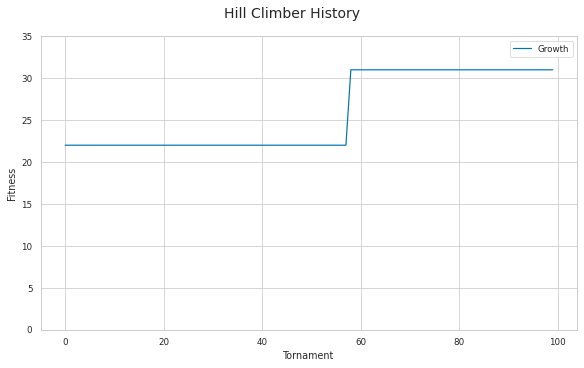

In [ ]:
fig = plt.figure(figsize=[8, 5], constrained_layout=True)
plt.plot(climber.benifitGrowth)
plt.xlabel("Tornament")
plt.ylabel("Fitness")
plt.legend(["Growth"])
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Hill Climber History", fontsize=14)
#fig.text(0.15, -0.075, "Figure 1: Growth of an instance of a hill climber over 100 generations, \nwith a mutation rate of 0.5")
plt.savefig('hill_climber_single.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download("hill_climber_single.png")

# Possible methods for analysing and understanding the hill climber

- Modify the mutation rate to see how much it affects the local maxima. 

- Modify the number of generations to see how many number of generations often ends in a local maxima.

- feature to measure: how long it takes to get to local maxima given the mutation rate.

- do for mutation rates:
  - 0.1
  - 0.2
  - 0.3
  - 0.4
  - 0.5
  - 0.6
  - 0.7
  - 0.8
  - 0.9

- Have 100 hill climbers run and find the average of their benifits. This will give a more reliable result of how well the hill climber tends to do.

- Add more items to see what the effect will be.

# Population of hill climbers (Comparison between individuals)

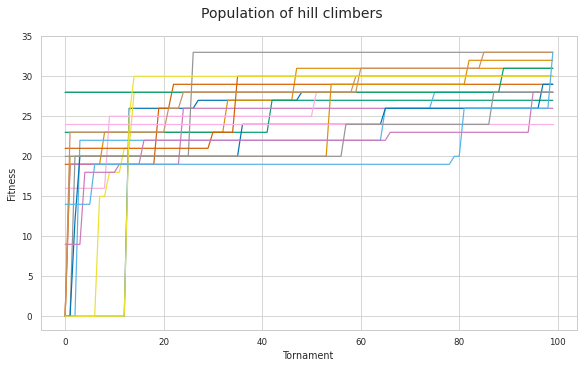

In [ ]:
fig = plt.figure(figsize=[8, 5], constrained_layout=True)
for i in range(20):
  gt = np.random.randint(2, size=10)
  climber = Hill_climber(items, gt, 20, 0.5)
  climber.run(100)
  plt.plot(climber.benifitGrowth)
  plt.xlabel("Tornament")
  plt.ylabel("Fitness")
  plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Population of hill climbers", fontsize=14)
#fig.text(0.15, -0.075, "Figure 2: Plots the growth of fitness for a series of hill climbers over 100 generations, \nwith a mutation rate of 0.5")
plt.savefig('hill_climber_population.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download("hill_climber_population.png")

# Comparing Mutation rates

## Growth rate over 100 iterations (mutation range 10% to 90%):

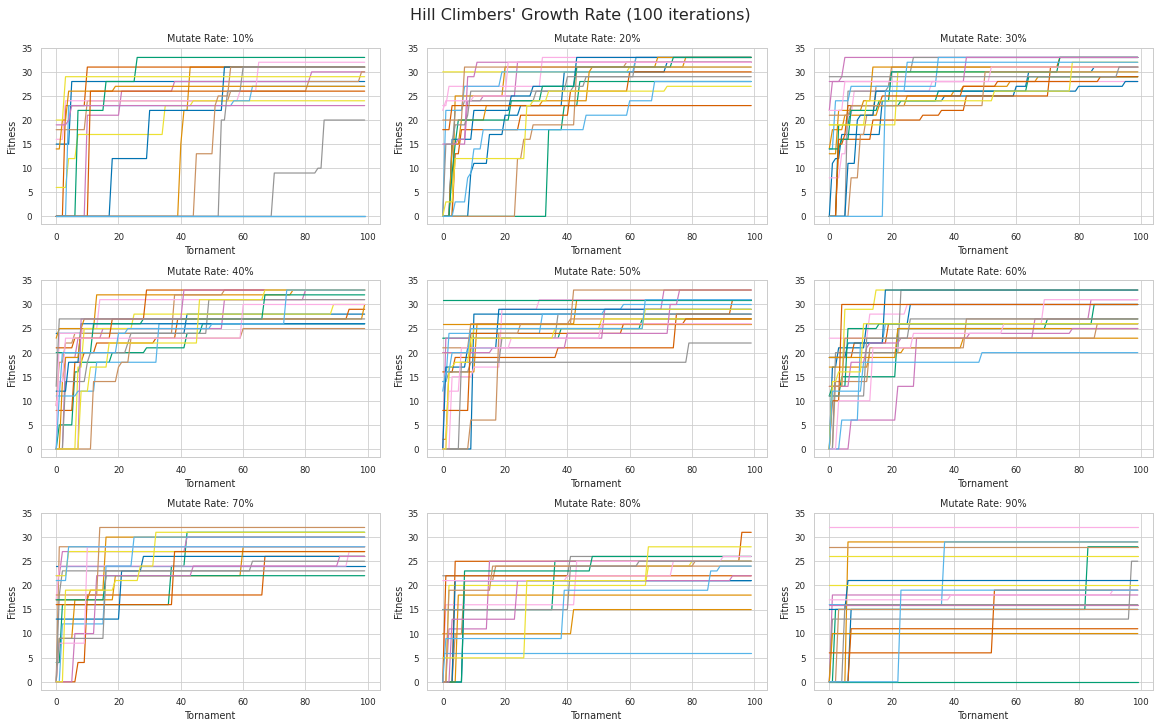

In [ ]:
counter = 0
fig, axes = plt.subplots(3, 3, figsize=(8*2, 5*2), constrained_layout=True)
for i in range(3):
  for j in range(3):
    counter += 1
    axes[i, j].set_title("Mutate Rate: " + str(counter*10) + "%")
    for l in range(20):
      gt = np.random.randint(2, size=10)
      climber = Hill_climber(items, gt, 20, counter/10)
      climber.run(100)
      axes[i, j].plot(climber.benifitGrowth)
      axes[i, j].set_xlabel("Tornament")
      axes[i, j].set_ylabel("Fitness")
      axes[i, j].set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Hill Climbers' Growth Rate (100 iterations)", fontsize=16)
#fig.text(0.2, -0.025, "Figure 3: Plots of the fitness growth of a series of hill climbers over 100 iterations. Shown using a variety of mutation rates.")
plt.savefig('hill_climber_mutation_100.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download("hill_climber_mutation_100.png")

## Growth rate over 4000 iterations (mutation range 10% to 90%):

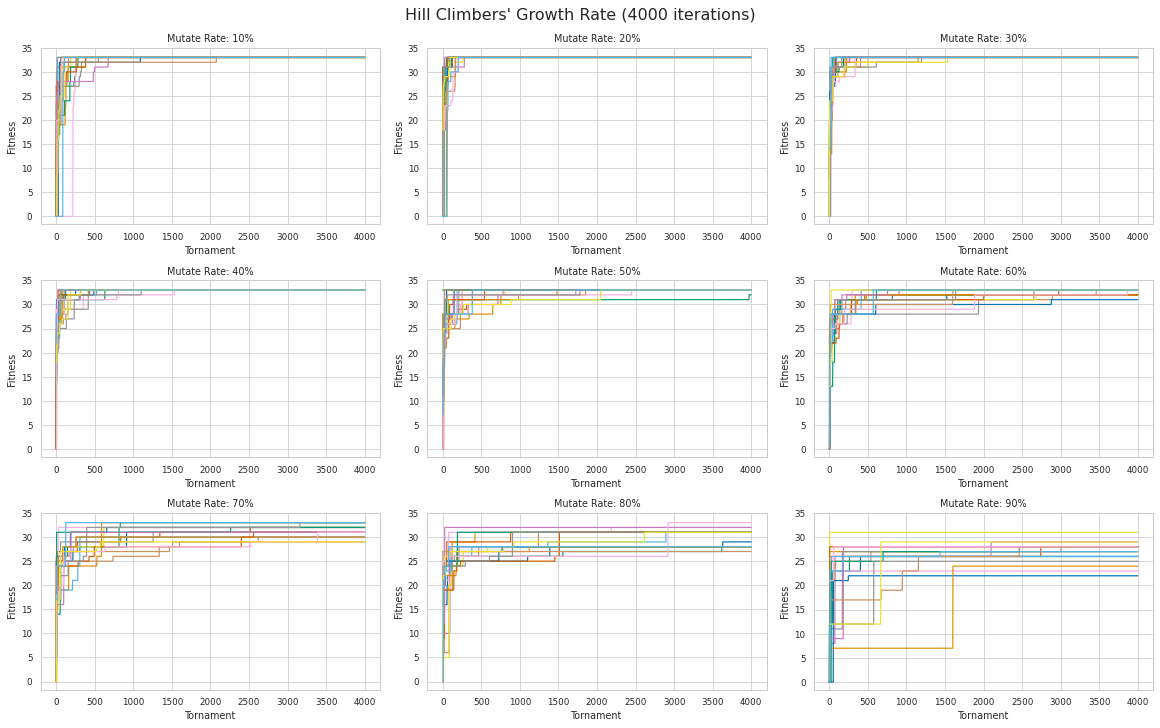

In [ ]:
counter = 0
fig, axes = plt.subplots(3, 3, figsize=(8*2, 5*2), constrained_layout=True)
for i in range(3):
  for j in range(3):
    counter += 1
    axes[i, j].set_title("Mutate Rate: " + str(counter*10) + "%")
    for l in range(20):
      gt = np.random.randint(2, size=10)
      climber = Hill_climber(items, gt, 20, counter/10)
      climber.run(4000)
      axes[i, j].plot(climber.benifitGrowth)
      axes[i, j].set_xlabel("Tornament")
      axes[i, j].set_ylabel("Fitness")
      axes[i, j].set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Hill Climbers' Growth Rate (4000 iterations)", fontsize=16)
#fig.text(0.2, -0.025, "Figure 4: Plots of the fitness growth of a series of hill climbers over 4000 iterations. Shown using a variety of mutation rates.")
plt.savefig('hill_climber_mutation_4000.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download("hill_climber_mutation_4000.png")

# Average fitness for varying mutation rates (10% to 90%)

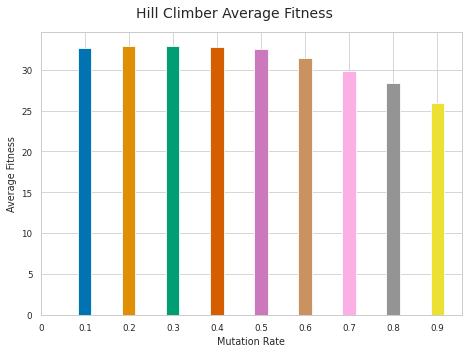

In [ ]:
counter = 0
climbers = 150
fig = plt.figure(figsize=[6.4, 4.8],constrained_layout=True)
for i in range(9):
  counter += 1
  total = 0
  for l in range(climbers):
    gt = np.random.randint(2, size=10)
    climber = Hill_climber(items, gt, 20, counter/10)
    climber.run(1000)
    total += climber.benifitGrowth[len(climber.benifitGrowth) - 1]
  plt.bar(counter, total/climbers, width=0.3)
plt.xlabel("Mutation Rate")
plt.ylabel("Average Fitness")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
fig.suptitle("Hill Climber Average Fitness", fontsize=14)
#fig.text(0.075, -0.075, "Figure 5: Plots the average fitness of 150 hill climbers over 1000 iterations \nfor a variety of mutation rates.")
plt.savefig('hill_climber_average.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download('hill_climber_average.png')

# Average fitness for varying mutation rates (10% to 90%) **and iterations**

Chosing an absurd iteration range will allow the hill climber to read its optimum local maxima almost definately. Finding the optimum iteration rate also allows for the optimisation of speed. It prevents carrying out any unnessessary iterations whilst acchieving optimum solutions.

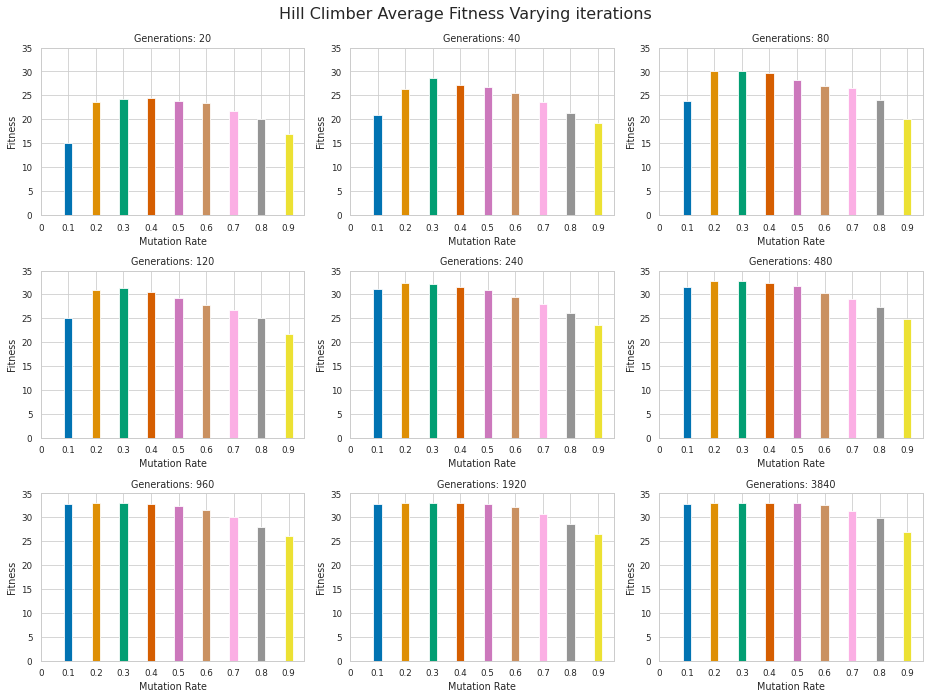

In [ ]:
iterationList = [20, 40, 80, 120, 240, 480, 960, 1920, 3840]

iterationCounter = 0
climbers = 150
fig, axes = plt.subplots(3, 3, figsize=[6.4 * 2, 4.8 * 2], constrained_layout=True)

for i in range(3):
  for j in range(3):
    iterationRate = iterationList[iterationCounter]
    iterationCounter += 1
    counter = 0
    for c in range(9):
      total = 0
      counter += 1
      for l in range(climbers):
        gt = np.random.randint(2, size=10)
        climber = Hill_climber(items, gt, 20, counter/10)
        climber.run(iterationRate)
        total += climber.benifitGrowth[len(climber.benifitGrowth) - 1]
      axes[i, j].bar(counter, total/climbers, width=0.3)
      axes[i, j].set_xlabel("Mutation Rate")
      axes[i, j].set_ylabel("Fitness")
      axes[i, j].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
      axes[i, j].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
      axes[i, j].set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
      axes[i, j].set_title("Generations: " + str(iterationList[iterationCounter - 1]))
fig.suptitle("Hill Climber Average Fitness Varying iterations", fontsize=16)
#fig.text(0.2, -0.025, "Figure 6: Plots the average fitness of 150 hill climbers over different iterations for a variety of mutation rates.")
plt.savefig('hill_climber_average_different_iter.png')
plt.show()
plt.close()

In [ ]:
#files.download('hill_climber_average_different_iter.png')